# Run Spectractor from notebooks

- adapted from https://github.com/stubbslab/PCWG-AuxTel/blob/main/Run_Spectractor_example.ipynb

- author : Sylvie Dagoret-campagne
- affiliation : IJCLab/IN2P3/CNRS
- update : September 2021 13th
- DM-Stack version : **w_2021_36**
- Big CPU

In [75]:
# wide scan : HD 160617 
all_myseq_holo=range(234,310)
# narrow scan :  HD 160617 
#all_myseq_holo=range(317,365)
all_myseq=all_myseq_holo

ExpoNum=242

In [76]:
#Check your stack container version matches the setup instructions!
version = ! eups list -s lsst_distrib
print(f'You are running {version[0].split()[1]} of lsst_distrib')

You are running current of lsst_distrib


Check your packages are setup, as per the setup instructions. Each of the ones setup should appear here. If they don't, you've missed the line in your .user_setups file

In [77]:
! eups list -s | grep LOCAL

atmospec              LOCAL:/home/dagoret/repos/atmospec 	setup
daf_butler            LOCAL:/home/dagoret/repos/daf_butler 	setup
eups                  LOCAL:/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-0.7.0/eups 	setup
rapid_analysis        LOCAL:/home/dagoret/repos/rapid_analysis 	setup


Redirect the logger outputs (stack and Spectractor) to the notebook:

In [78]:
from lsst.log.utils import enable_notebook_logging
enable_notebook_logging()

Make a bulter, pick an image, and make a data reference to it:

In [79]:
import lsst.daf.persistence as dafPersist

#After mfl created /project/shared/auxTel/rerun/dagoret (2021/09/09):
#repoDir='/project/shared/auxTel/rerun/dagoret/output'
#repoDir='/project/shared/auxTel/rerun/dagoret'
repoDir='/project/shared/auxTel/rerun/dagoret/outputspectr_scan2021_July'
butler=  dafPersist.Butler(repoDir)

dataId = {'dayObs': '2021-07-07', 'seqNum': ExpoNum}
# good
#dataId = {'dayObs': '2021-07-07', 'seqNum': 330}
dataRef = butler.dataRef('raw', **dataId)

LsstCamMapper WARN: Unable to find valid calib root directory
CameraMapper INFO: Loading exposure registry from /lsstdata/offline/instrument/LATISS/gen2repo/registry.sqlite3
CameraMapper INFO: Loading calib registry from /project/shared/auxTel/CALIB/calibRegistry.sqlite3
CameraMapper INFO: Loading calib registry from /project/shared/auxTel/CALIB/calibRegistry.sqlite3


In [80]:
type(dataId)

dict

Instantiate the task, set our config options

In [81]:
from lsst.atmospec import ProcessStarTask

config = ProcessStarTask.ConfigClass()
config.doDisplayPlots = True  # show the plots in the notebook
config.spectractorDebugMode = True  # make all the debug plots along the way
config.binning = 4

# pretty minimal ISR because some things we don't have the calib products available for
# most of this would be picked up automatically if running from the command line from config files
config.isr.doLinearize = False
config.isr.doDark = False
config.isr.doFlat = False
config.isr.doFringe = False
config.isr.doDefect = True
config.isr.doCrosstalk = False
config.isr.doSaturationInterpolation = False

task = ProcessStarTask(config=config)

Set this so that the plots pop up in the notebook

In [82]:
%matplotlib inline

Run, and watch the debug plots roll in. If you've selected a writable rerun above, the result will also be butler.put() in there so you can butler.get() it later, but we can also catch the result as it's returned by the runDataRef() method

2021-09-13 16:00:47,173 obs.lsst.assembly logCmd               WARNING (minimum=(0, 0), maximum=(543, 2047)): (minimum=(0, 0), maximum=(575, 2047))
2021-09-13 16:00:48,665 astro_metadata_translator.headers fix_header           CRITICAL Ignoring translator header fixup of LATISS None: 'MJD-OBS not found'
2021-09-13 16:00:52,518 processStar.isr roughZeroPoint       WARNING No rough magnitude zero point defined for filter RG610~holo4_003.
2021-09-13 16:00:55,358 LsstLatissMapper _computeCcdExposureId WARNING Controller unknown, using 'C'
2021-09-13 16:01:19,908 processStar runAstrometry        WARNING Failed to find an acceptable match
2021-09-13 16:01:20,605 processStar runDataRef           WARNING Astrometric fit failed, failing over to source-finding centroid


Loading config from /home/dagoret/repos/atmospec/config/auxtel.ini


lsst.atmospec.spectraction WARN: Supplementary parameter already existed CALLING_CODE in parameters, use overrideParameters() to override already existing keys instead.
lsst.atmospec.spectraction WARN: Supplementary parameter already existed STAR_NAMES in parameters, use overrideParameters() to override already existing keys instead.
lsst.atmospec.spectraction INFO: Starting SPECTRACTOR
2021-09-13 16:01:27,151 Image      check_statistical_error WARNING 
	Fitted read out noise seems to be different than input readout noise. Fit=0.7337140678540904 but average of self.read_out_noise is 1.0.


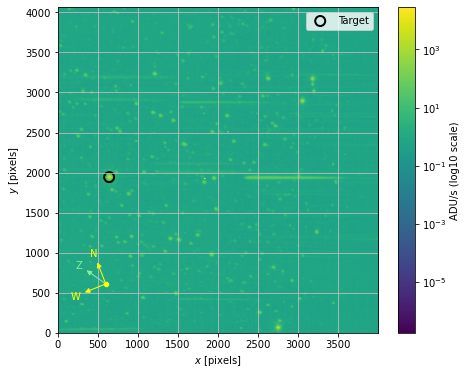

lsst.atmospec.spectraction INFO: Pixel value at centroid = 2369.209765625
lsst.atmospec.spectraction INFO: Rebinning image with rebin of 4


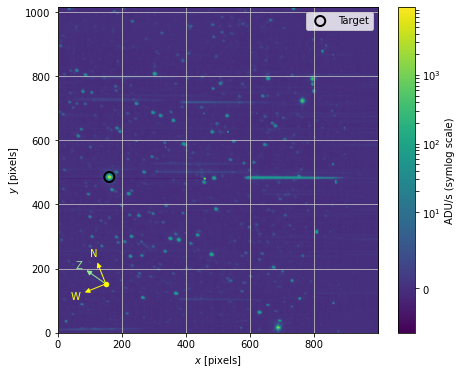

lsst.atmospec.spectraction INFO: Search for the target in the image...


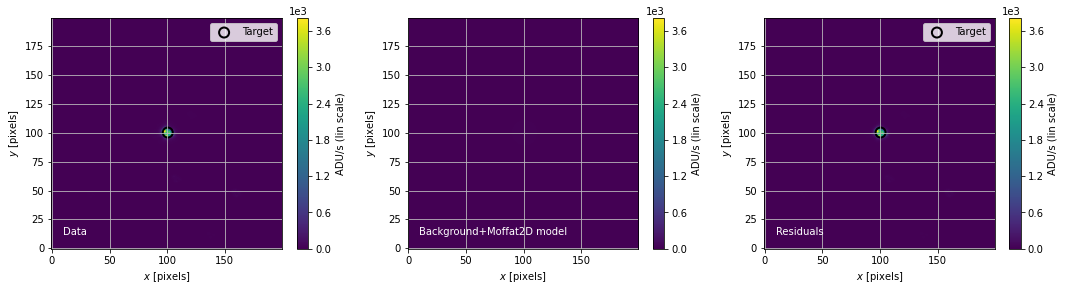

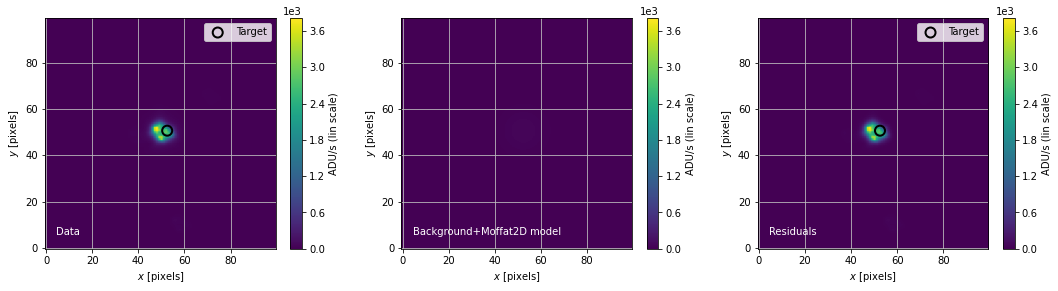

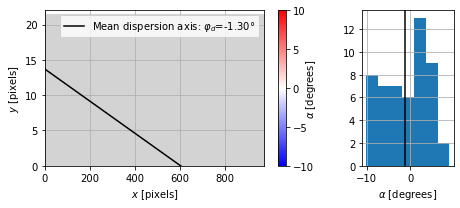

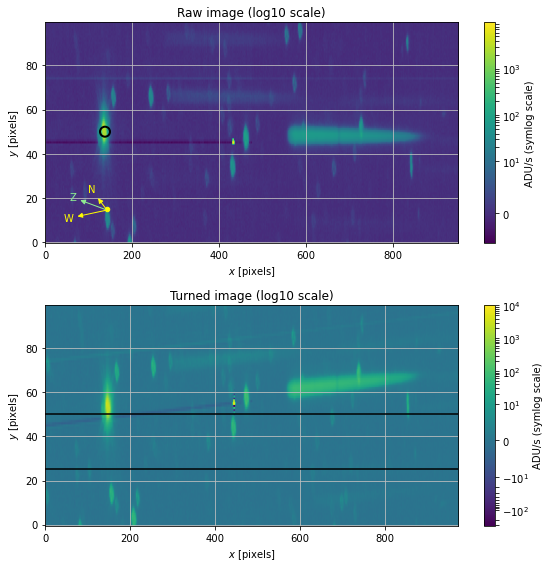

lsst.atmospec.spectraction INFO: Search for the target in the rotated image...


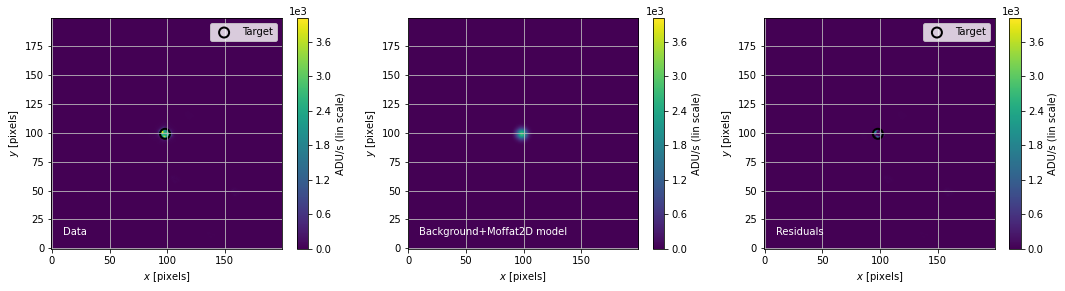

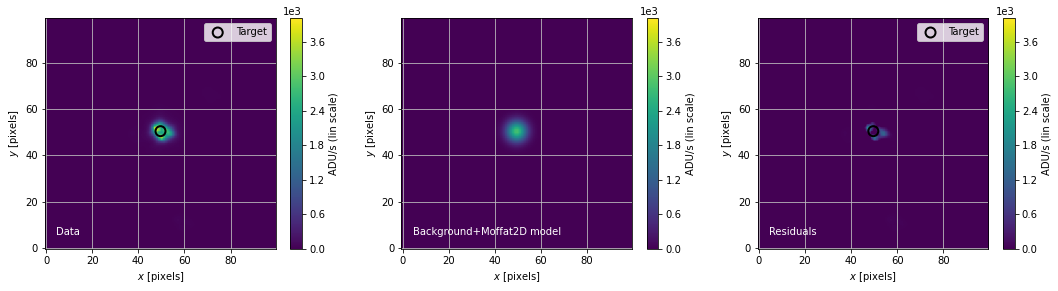

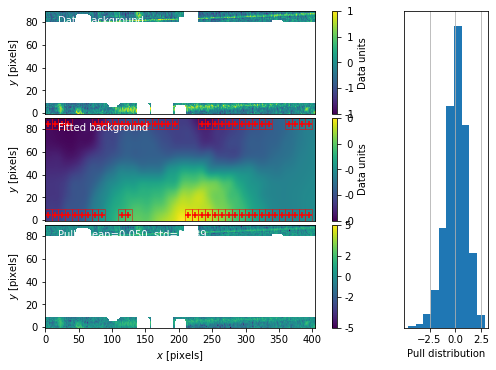

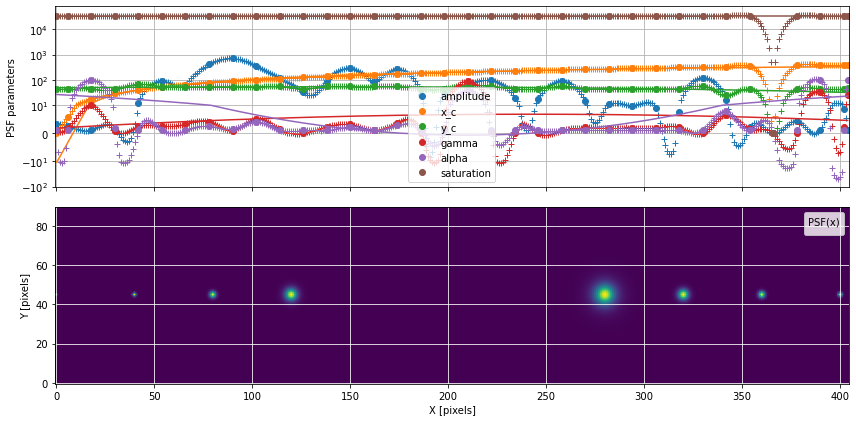

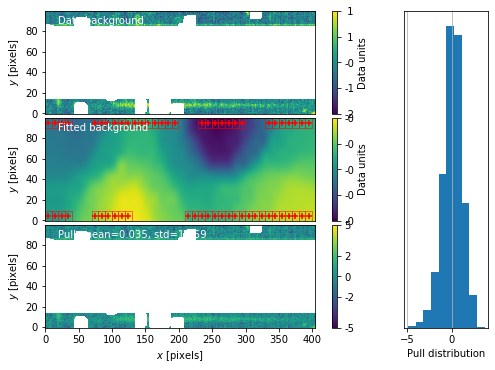

/home/dagoret/repos/Spectractor/spectractor/fit/fitter.py:1296: OptimizeWarning: Unknown solver options: gtol, maxls, maxcor
  result = optimize.minimize(nll, fit_workspace.p, method=minimizer_method,


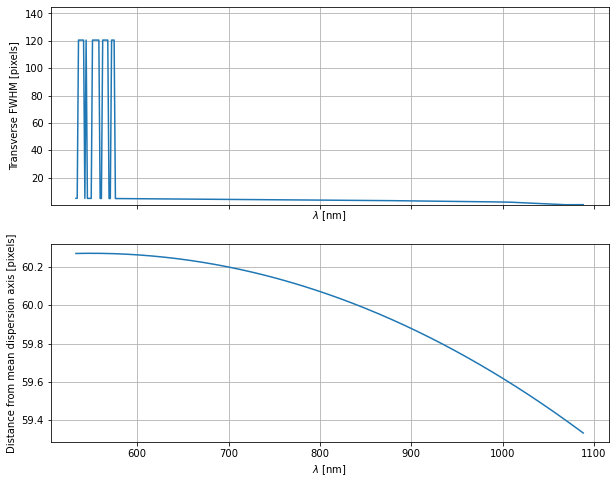

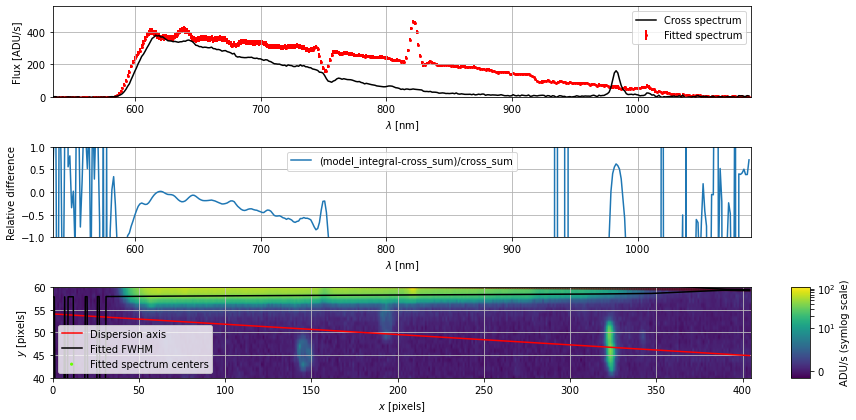

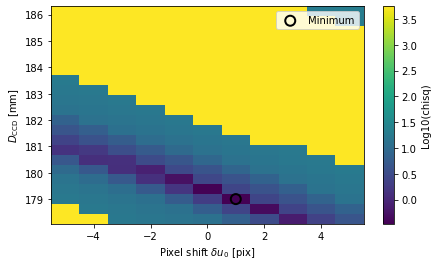

2021-09-13 16:12:56,147 Spectrum   convert_from_flam_to_ADUrate WARNING You ask to convert spectrum already in ADU/s in ADU/s... check your code ! Skip the instruction


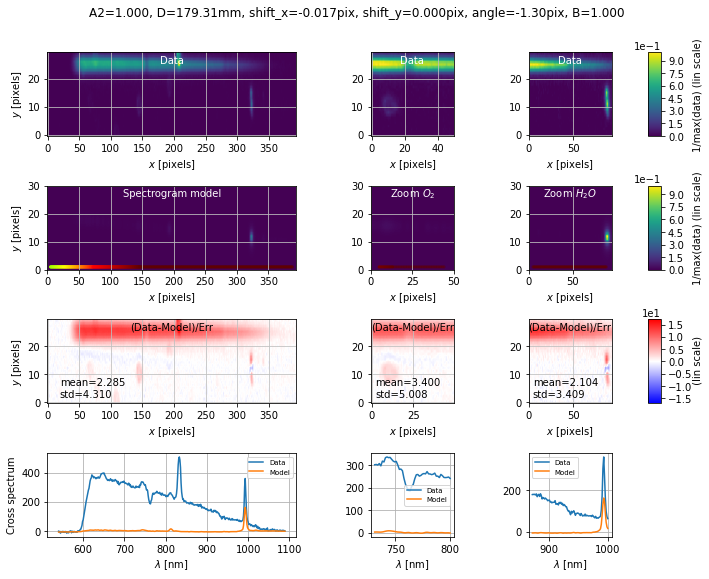

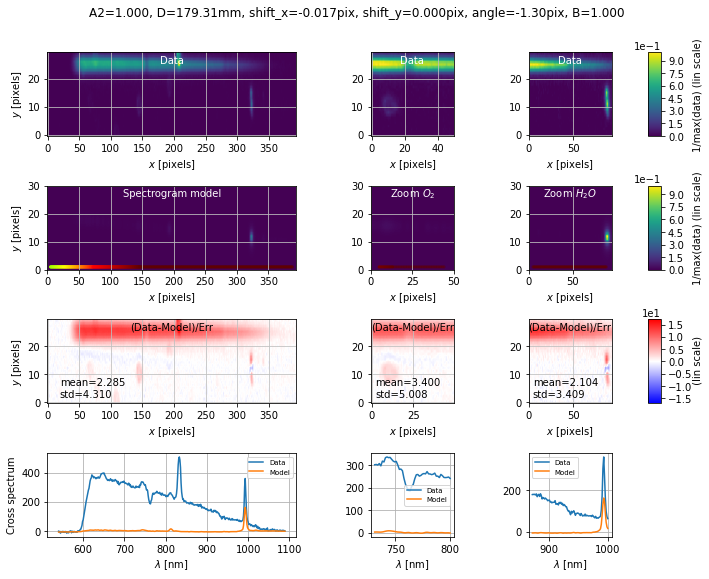

2021-09-13 16:14:12,456 spectractor.fit.fitter gradient_descent     WARNING 
	Step 2: alpha_0 has a null Jacobian; parameter is fixed at its last known current value (0.16815244782458638).
2021-09-13 16:14:12,550 spectractor.fit.fitter gradient_descent     WARNING 
	Step 2: alpha_1 has a null Jacobian; parameter is fixed at its last known current value (0.6849220714668345).
2021-09-13 16:14:12,552 spectractor.fit.fitter gradient_descent     WARNING 
	Step 2: alpha_2 has a null Jacobian; parameter is fixed at its last known current value (-1.3094179387498386).
2021-09-13 16:15:16,947 spectractor.fit.fitter gradient_descent     WARNING 
	Step 5: gamma_0 has a null Jacobian; parameter is fixed at its last known current value (-1051511.949257997).
2021-09-13 16:15:16,952 spectractor.fit.fitter gradient_descent     WARNING 
	Step 5: gamma_1 has a null Jacobian; parameter is fixed at its last known current value (-1616568.4892320584).
2021-09-13 16:15:16,953 spectractor.fit.fitter gradient_d

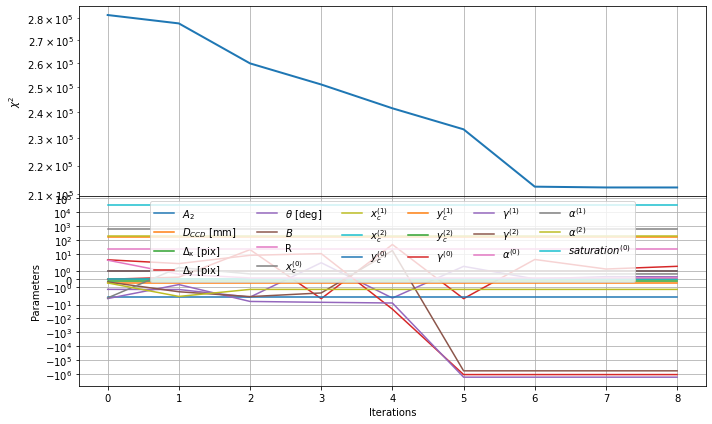

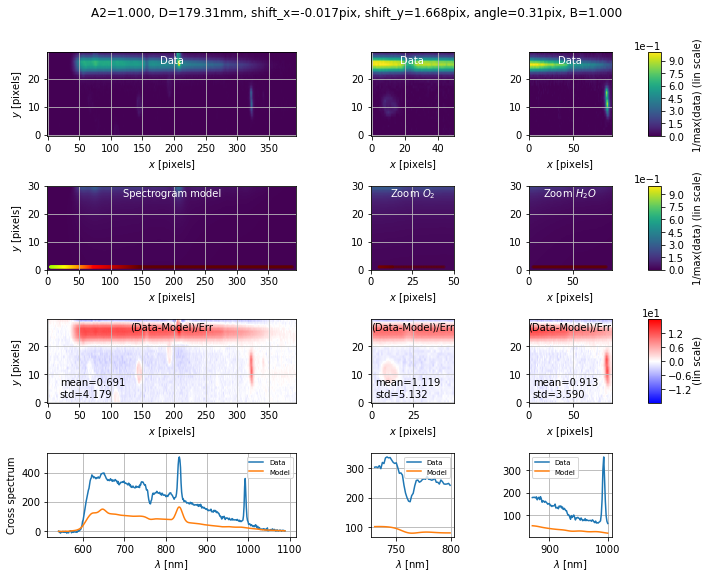

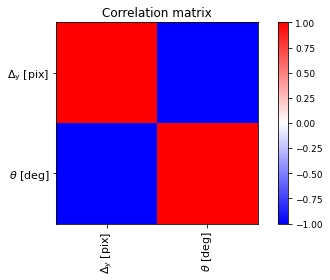

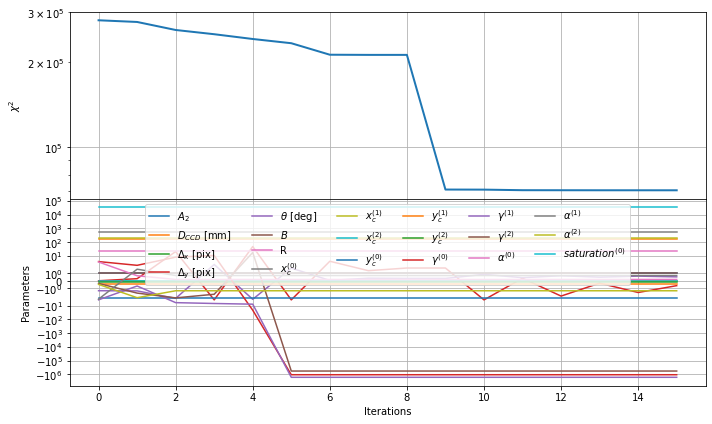

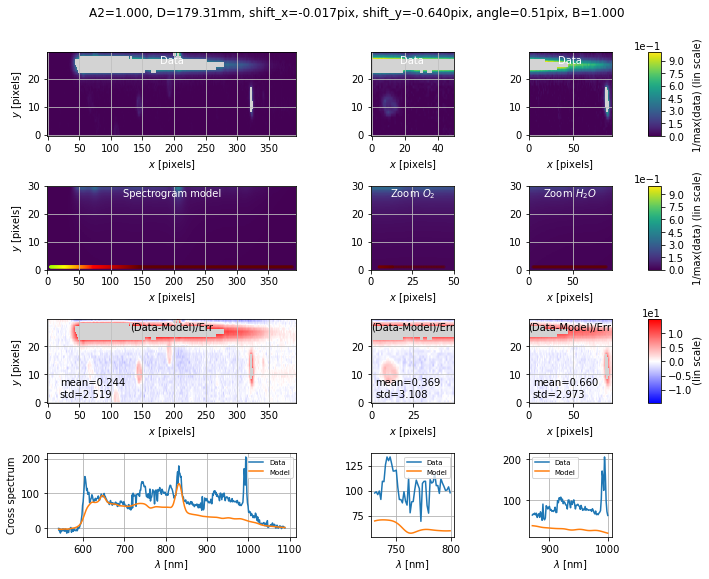

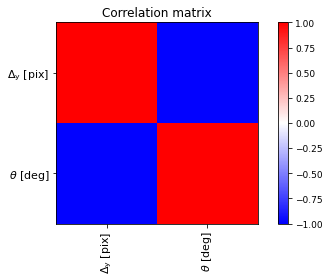

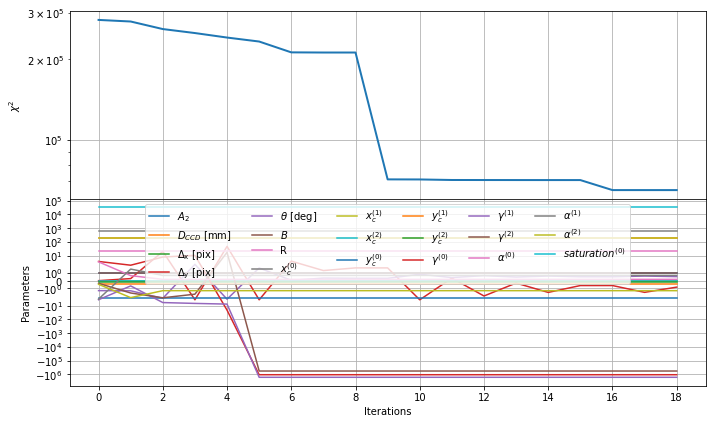

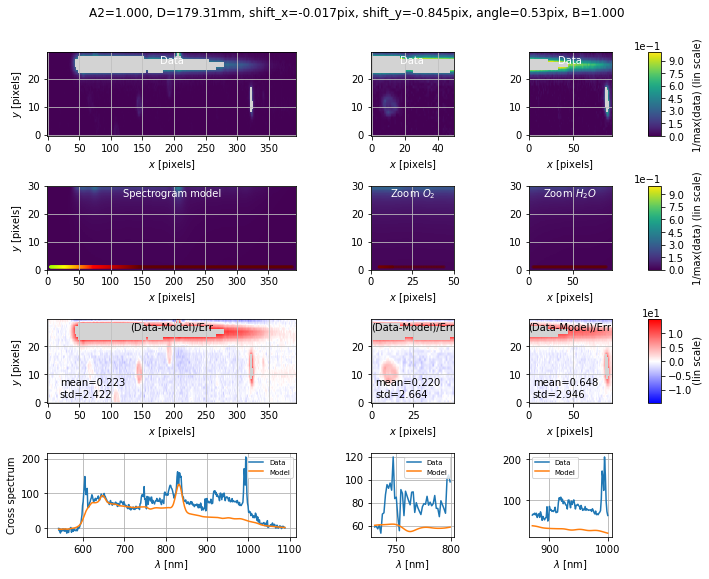

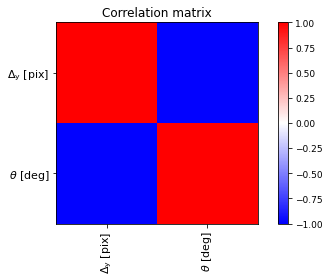

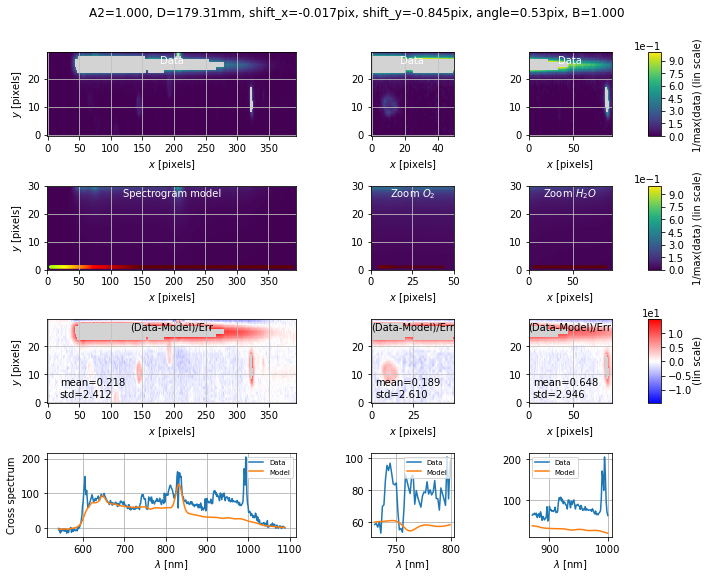

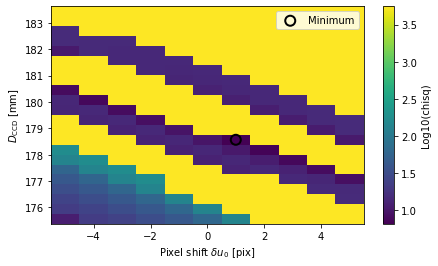

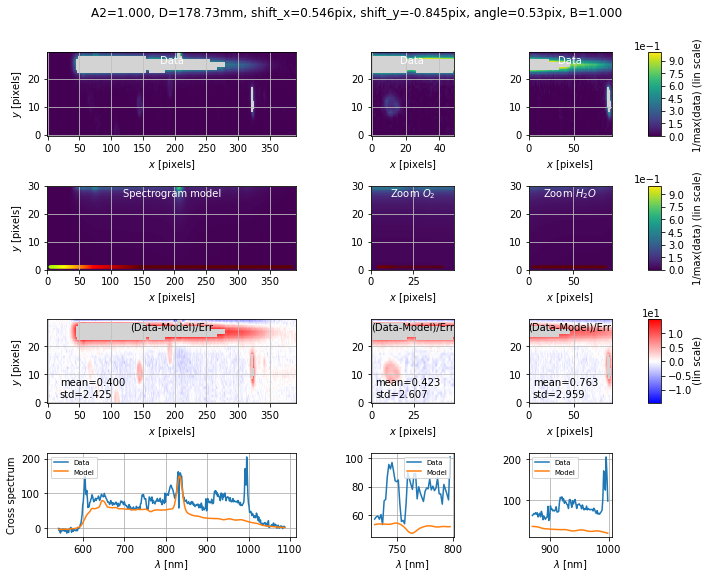

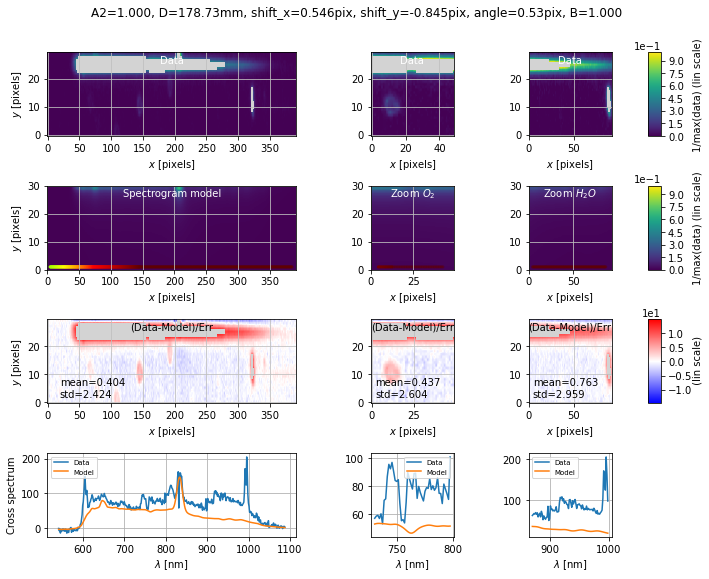

2021-09-13 16:19:05,147 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha_0 has a null Jacobian; parameter is fixed at its last known current value (0.16815244782458638).
2021-09-13 16:19:05,153 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha_1 has a null Jacobian; parameter is fixed at its last known current value (0.6849220714668345).
2021-09-13 16:19:05,154 spectractor.fit.fitter gradient_descent     WARNING 
	Step 0: alpha_2 has a null Jacobian; parameter is fixed at its last known current value (-1.3094179387498386).
2021-09-13 16:19:22,055 spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: gamma_0 has a null Jacobian; parameter is fixed at its last known current value (-1050946.335516509).
2021-09-13 16:19:22,149 spectractor.fit.fitter gradient_descent     WARNING 
	Step 1: gamma_1 has a null Jacobian; parameter is fixed at its last known current value (-1619400.360626064).
2021-09-13 16:19:22,150 spectractor.fit.fitter gradient_de

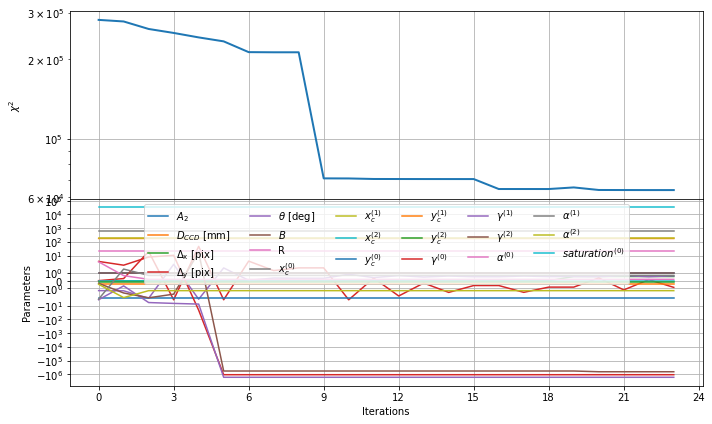

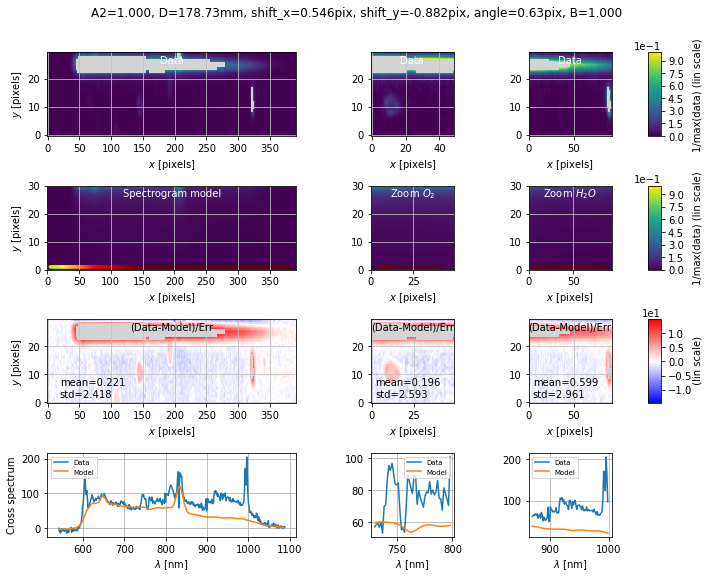

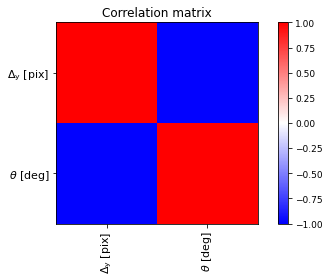

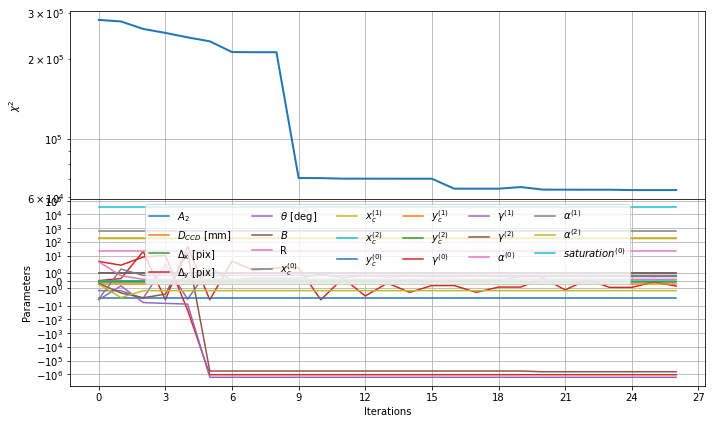

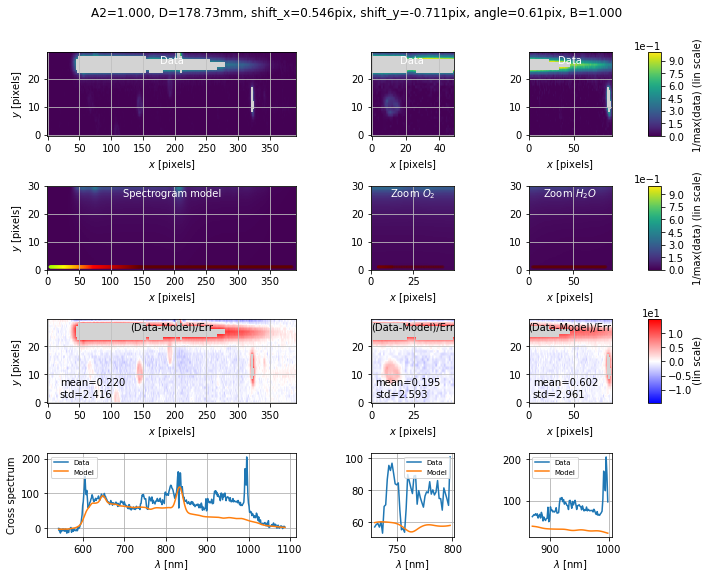

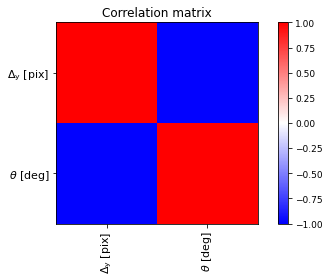

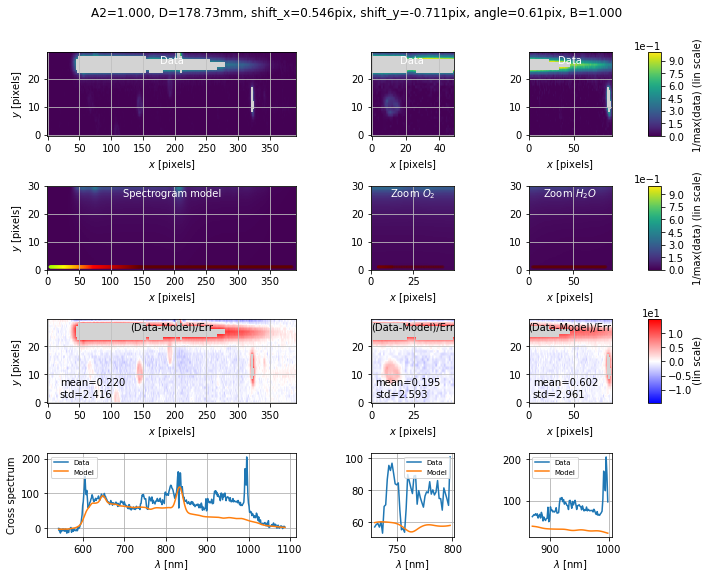

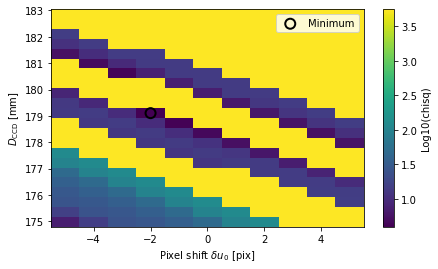

In [83]:
result = task.runDataRef(dataRef)

In [84]:
print("hello")

hello


In [85]:
print(result)